# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [41]:
!pip install scikit-optimize

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.0 MB/s eta 0:00:00


# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
url='https://drive.google.com/uc?id=1Bm6MGQ_g-5OOsryjYcMbmF-eKcfVaRZf'
df = pd.read_csv(url)



In [4]:
# Tampilkan 5 baris pertama dengan function head.
df.head(5)

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_real,AccountBalance_real,Target
0,0.007207,0.838710,0.244828,0.0,0.336832,0.244828,5118.794709,1.0
1,0.195940,0.806452,0.451724,0.0,0.918055,0.451724,13779.013951,0.0
2,0.065680,0.016129,0.158621,0.0,0.068637,0.158621,1122.696505,1.0
3,0.096016,0.129032,0.051724,0.0,0.569198,0.051724,8581.049544,0.0
4,0.006874,0.435484,0.648276,0.0,0.492591,0.648276,7439.607669,2.0


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [17]:
# Hapus baris yang nilai Target-nya NaN
df_cleaned = df.dropna(subset=["Target"])

# Pisahkan fitur dan label
X = df_cleaned.drop(columns=["Target"])
y = df_cleaned["Target"]

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1834, 7), y_train=(1834,)
Test set shape: X_test=(459, 7), y_test=(459,)


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

==== Decision Tree Classifier ====
Confusion Matrix:
[[152   1   4]
 [  3 185   1]
 [  0   1 112]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       157
         1.0       0.99      0.98      0.98       189
         2.0       0.96      0.99      0.97       113

    accuracy                           0.98       459
   macro avg       0.98      0.98      0.98       459
weighted avg       0.98      0.98      0.98       459

Accuracy: 0.9782
Precision (macro): 0.9757
Recall (macro): 0.9794
F1-score (macro): 0.9774

----------------------------------------



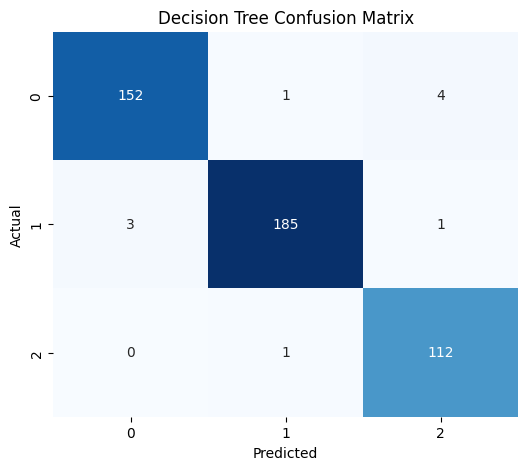

In [22]:
# Buatlah model klasifikasi menggunakan Decision Tree
dt = DecisionTreeClassifier().fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)


print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)

#Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

#Skor agregat
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred_dt, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# Menyimpan Model
import joblib
joblib.dump(dt, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

==== K-Nearest Neighbors (KNN) Classifier ====
Confusion Matrix:
[[62 88  7]
 [83 85 21]
 [52 52  9]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.31      0.39      0.35       157
         1.0       0.38      0.45      0.41       189
         2.0       0.24      0.08      0.12       113

    accuracy                           0.34       459
   macro avg       0.31      0.31      0.29       459
weighted avg       0.32      0.34      0.32       459

Accuracy: 0.3399
Precision (macro): 0.3119
Recall (macro): 0.3081
F1-score (macro): 0.2936

----------------------------------------



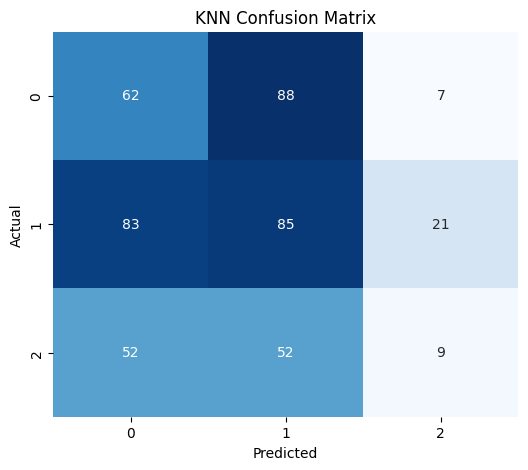

In [27]:
# Melatih model menggunakan algoritma klasifikasi selain Decision Tree.
# Inisialisasi dan latih model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # kamu bisa ubah jumlah tetangga di sini
knn.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn.predict(X_test)

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Tampilkan hasil evaluasi
print("==== K-Nearest Neighbors (KNN) Classifier ====")
print("Confusion Matrix:")
print(cm_knn)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred_knn, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
#Tampilkan hasil evaluasi Decision Tree
print("==== Decision Tree Classifier ====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred_dt, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

# Tampilkan hasil evaluasi KNN
print("==== K-Nearest Neighbors (KNN) Classifier ====")

print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred_knn, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")



==== Decision Tree Classifier ====
Accuracy: 0.9782
Precision (macro): 0.9757
Recall (macro): 0.9794
F1-score (macro): 0.9774

----------------------------------------

==== K-Nearest Neighbors (KNN) Classifier ====
Accuracy: 0.3399
Precision (macro): 0.3119
Recall (macro): 0.3081
F1-score (macro): 0.2936

----------------------------------------



###Hasil Analisa
Decision Tree

- Hasil evaluasi model klasifikasi Decision Tree menunjukkan bahwa model bekerja sangat baik untuk klasifikasi 3 kelas.

- Model tidak hanya akurat secara umum, tapi juga seimbang performanya untuk semua kelas, tanpa bias yang signifikan ke salah satu kelas

KNN

- Hasil analisis performa model K-Nearest Neighbors (KNN) Classifier menunjukkan bahwa kinerja model cukup rendah dalam mengklasifikasikan data.

In [29]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
import joblib
joblib.dump(knn, 'explore_knn_classification.h5')

['explore_knn_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [42]:
# Lakukan Hyperparameter Tuning dan Latih ulang.

# Membagi dataset menjadi training set dan testing set (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

# Inisialisasi model Decision Tree tanpa hyperparameter tuning
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Evaluasi awal model tanpa tuning
initial_score = dt.score(X_test, y_test)
print(f"Initial accuracy on test set (without tuning): {initial_score:.2f}")


#GRID SEARCH
# Definisikan parameter grid untuk Grid Search
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Grid Search): {grid_search.best_params_}")
best_dt_grid = grid_search.best_estimator_

# Evaluasi performa model pada test set
grid_search_score = best_dt_grid.score(X_test, y_test)
print(f"Accuracy after Grid Search: {grid_search_score:.2f}")


#RANDOMIZED SEARCH
# Definisikan ruang pencarian parameter untuk Decision Tree
param_dist = {
    'max_depth': np.linspace(10, 50, 5, dtype=int),           # [10, 20, 30, 40, 50]
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit ke data training
random_search.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Random Search): {random_search.best_params_}")
best_dt_random = random_search.best_estimator_

# Evaluasi performa model pada test set
random_search_score = best_dt_random.score(X_test, y_test)
print(f"Accuracy after Random Search: {random_search_score:.2f}")


#BAYESIAN OPTIMIZATION
# Definisikan ruang pencarian parameter untuk Decision Tree
param_space = {
    'max_depth': Integer(10, 50),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5),
    'criterion': Categorical(['gini', 'entropy'])
}

# Inisialisasi Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Inisialisasi BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=dt,
    search_spaces=param_space,
    n_iter=32,
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit ke data training
bayes_search.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_dt_bayes = bayes_search.best_estimator_

# Evaluasi performa model pada test set
bayes_search_score = best_dt_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}")

Shape of training data: (1605, 7)
Shape of testing data: (688, 7)
Initial accuracy on test set (without tuning): 0.97
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters (Grid Search): {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy after Grid Search: 0.98
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters (Random Search): {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': np.int64(30), 'criterion': 'entropy'}
Accuracy after Random Search: 0.98
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each

###Hasil Tunning
Sebelum menggunakan hyperparameter tunning, hasil performa ada di 0,97.

Saat menggunakan hyperparameter tunning dengan tiga model, hasil yang diberikan meningkat, yaitu memiliki performa di 0,98.

In [43]:
# Menyimpan Model hasil tuning
import joblib
joblib.dump(best_dt_grid, 'tuning_classification_grid.h5')
joblib.dump(best_dt_random, 'tuning_classification_random.h5')
joblib.dump(best_dt_bayes, 'tuning_classification_bayes.h5')


['tuning_classification_bayes.h5']